## 판다스 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프 그릴 수 있음.
- 선그래프 : plot() 메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
- 막대 그래프 : plot(kind='bar')
- 히스토그램 : plot(kind='hist')
- 산점도 : plot(x='', y='', kind='scatter'), 상관관계를 볼 수 있음.
- 박스 플롯 : plot(kind='box'), 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## 남북한 발전전력량

In [2]:
import pandas as pd

df = pd.read_excel('남북한발전전력량.xlsx')
df.head(10)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


#### Q. 남한, 북한 발전량 합계 데이터만 추출, df_ns 이름으로 저장 및 출력하세요.


In [3]:
df_ns = df.iloc[[0,5], 2:]
print()
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.astype('int')   # 열 이름의 자료형을 정수형으로 변경
display(df_ns)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


#### 년도별 남북한 발전전력량
선 그래프 그리기

In [4]:
df_ns.plot()

#### Q. 남한, 북한의 연도별 전년도별 남북한 발전전력량을 볼 수 있도록 데이터 전처리 한 후 tdf_ns로 저장하고 처음 5행을 출력하세요.

In [5]:
# 남한, 북한의 연도별 전년도별 남북한 발전전력량을 볼 수 있도록 데이터 전처리
tdf_ns = df_ns.T
display(tdf_ns.head())
tdf_ns.loc[:,['South']].head()

,South,North
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


,South
1990,1077
1991,1186
1992,1310
1993,1444
1994,1650


#### Q. tdf_ns 데이터 프레임으로 남북한의 연도별 발전전력량의 트렌드를 볼 수 있는 선 그래프를 출력하세요

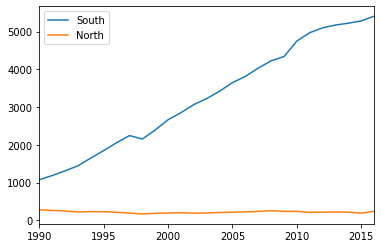

In [6]:
tdf_ns.plot()

###### 막대그래프

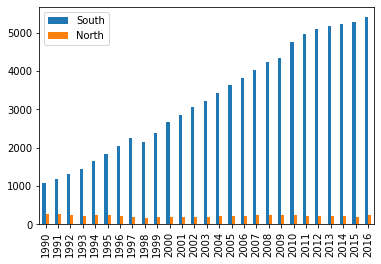

In [7]:
tdf_ns.plot(kind='bar')

###### 히스토그램

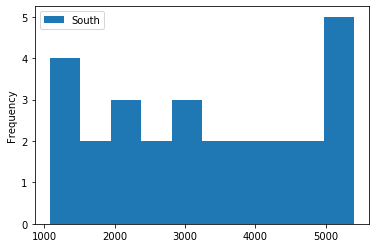

In [8]:
tdf_s = tdf_ns.loc[:,['South']]
tdf_s.plot(kind='hist')
# tdf_ns.plot(kind='hist')
# tdf_ns.North.plot(kind='hist')
# tdf_ns.South.plot(kind-'hist')

#### Q. 'auto-mpg.csv'데이터셋을 불러와서

#### Q. df_s 에서 mpg와 각 컬럼간의 산점도를 그리고 음의 상관관계가 있는 변수를 기술하세요.

In [9]:
df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']
df_s = df[['mpg', 'cylinders', 'weight', 'displacement', 'acceleration']]
display(df_s.head())

,mpg,cylinders,weight,displacement,acceleration
0,18.0,8,3504.0,307.0,12.0
1,15.0,8,3693.0,350.0,11.5
2,18.0,8,3436.0,318.0,11.0
3,16.0,8,3433.0,304.0,12.0
4,17.0,8,3449.0,302.0,10.5


In [10]:
df_s.corr()

,mpg,cylinders,weight,displacement,acceleration
mpg,1.000000,-0.775396,-0.831741,-0.804203,0.420289
cylinders,-0.775396,1.000000,0.896017,0.950721,-0.505419
weight,-0.831741,0.896017,1.000000,0.932824,-0.417457
displacement,-0.804203,0.950721,0.932824,1.000000,-0.543684
acceleration,0.420289,-0.505419,-0.417457,-0.543684,1.000000


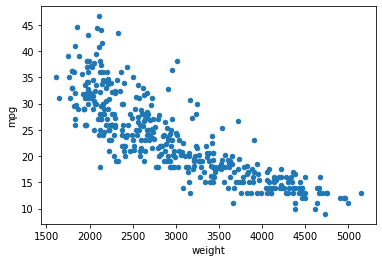

In [11]:
# 2개 열을 선택하여 산점도 그리기
df_s.plot(x='weight', y='mpg', kind='scatter')

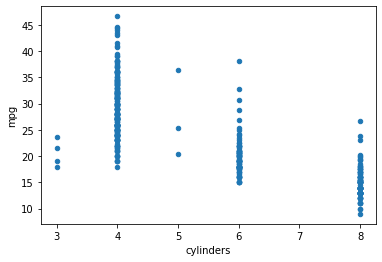

In [12]:
df_s.plot(x='cylinders', y='mpg', kind='scatter')

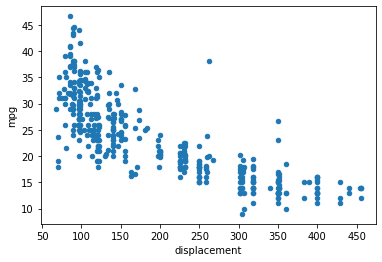

In [13]:
df_s.plot(x='displacement', y='mpg', kind='scatter')

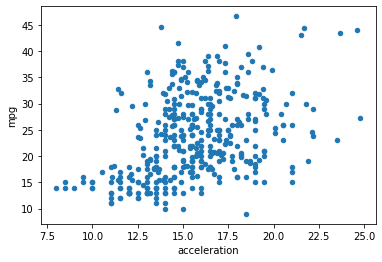

In [14]:
df_s.plot(x='acceleration', y='mpg', kind='scatter')

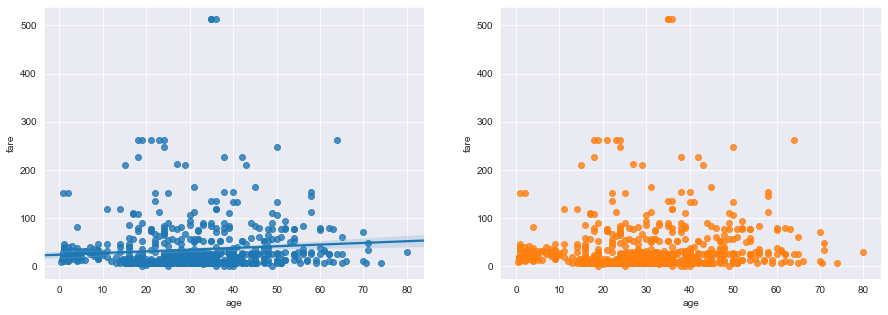

In [15]:
# titanic age, fare 컬럼간 상관관계
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정 (5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시 (fit_reg = True)
sns.regplot(x='age',     # x축 변수
           y='fare',     # y축 변수
           data=titanic, # 데이터
           ax=ax1,
           fit_reg=True)       # axe객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시 (fit_reg=False)
sns.regplot(x='age',     # x축 변수
           y='fare',     # y축 변수
           data=titanic, # 데이터
           ax = ax2,     # axe객체 - 1번째 그래프
           fit_reg=False) # 회귀선 표시
plt.show()

###### Q. auto-mpg.csv의 df_s 각 컬럼간의 상관관계에 대한 시각화를 아래와 같이 수행 하세요.
- 2개의 행과 2개의 열을 가진 subplots를 이용해서 표현
- Seaborn의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표현

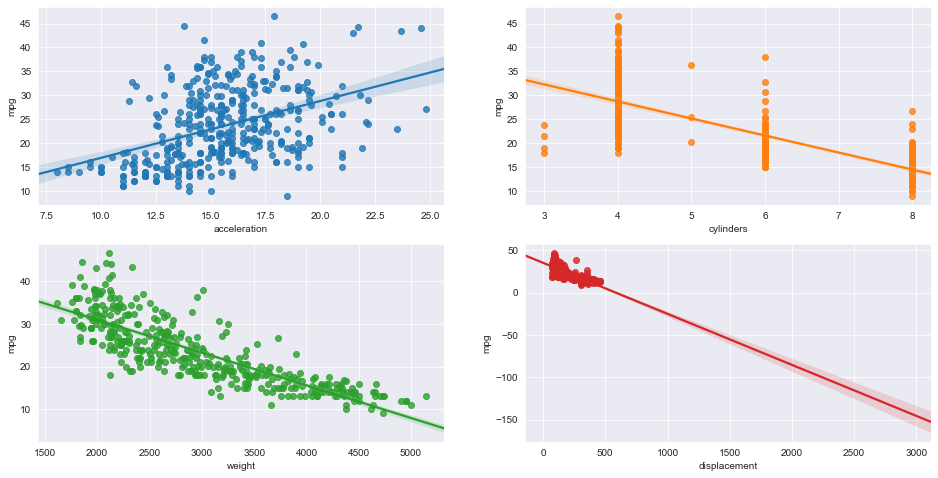

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
lm_features = ['acceleration', 'cylinders', 'weight', 'displacement']
for i, feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # Searborn의 replot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='mpg', data=df_s, ax=axs[row][col])

## Box plot 의미 해석 _범위와 분표를 확인
- 중앙값
- IQR(Inter Quartile Range): 제 3사분위수 _ 제1사분위수
- lower whisker: Q1 - 1.5 × IQR 보다 작은 값
- upper whisker: Q3 + 1.5 × IQR 보다 큰 값
- 이상치: lower whisker, upper whisker를 벗어나는 값
    - (an outlier is any number less than Q1-(1.5×IQR) or greater than Q3+(1,5×IQR))

In [17]:
import pandas as pd

box_df = pd.DataFrame([[25, 28, 29, 29, 30, 34, 35, 35, 37, 38], [25, 28, 29, 29, 30, 34, 35, 35, 37, 50]], index=['m1', 'm2'], columns=['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10'])

display(box_df)
box_t = box_df.transpose()
display(box_t.head(2))

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
m1,25,28,29,29,30,34,35,35,37,38
m2,25,28,29,29,30,34,35,35,37,50


,m1,m2
y1,25,25
y2,28,28


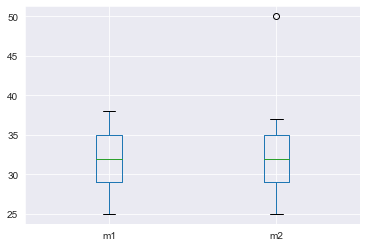

In [18]:
box_t[['m1', 'm2']].plot(kind='box')

In [19]:
box_t.describe()

,m1,m2
count,10.000000,10.000000
mean,32.000000,33.200000
std,4.346135,7.020605
min,25.000000,25.000000
25%,29.000000,29.000000
50%,32.000000,32.000000
75%,35.000000,35.000000
max,38.000000,50.000000


###### Q. box_t의 m2 칼럼의 box_plot의 중앙값, IQR, lower whisker, upper whisker, 이상치를 구하여 기술하세요

In [20]:
# upper whisker 산출
uw = 35 + 1.5 * 6
print(uw)
lw = 29 - 1.5 * 6
print(lw)

44.0
20.0


In [21]:
# 이상치 : 44보다 큰수 50
m2 = [25,28,29,29,30,34,35,35,37,50]

###### Q. 'auto-mpg.csv' 데이터셋을 불러와서 'mpg', 'cylinders'칼럼의 box plot을 그리고 중앙값, IQR, lower whisker, upper whisker 값을 구하고 이상치 갯수를 구하여 기술하세요.

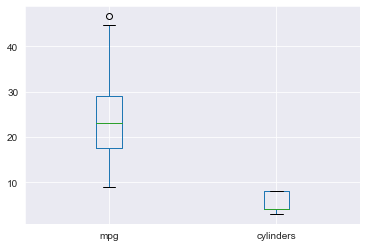

In [22]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']
df[['mpg', 'cylinders']].plot(kind='box')

In [23]:
df_s.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [24]:
df_s = df.sort_values(by='mpg', ascending=False)
df_s.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
321,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
328,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
324,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
325,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [25]:
# mpg의 이상치 : 46.6
# IQR : 11.5
uw_m = 29 + (11.5*1.5)
print(uw_m)
print()
lw_m = 17.5 - (11.5*1.5)
print(lw_m)

46.25

0.25


## Matplotlib - 기본 그래프 도구

In [26]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [27]:
df.전출지별.isnull().sum()

306

In [28]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [29]:
df.전출지별.isnull().sum()

0

In [30]:
# 서울에서 다른지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


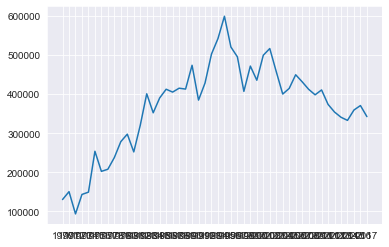

In [31]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
# plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

In [32]:
import warnings
warnings.filterwarnings('ignore')

## 정리

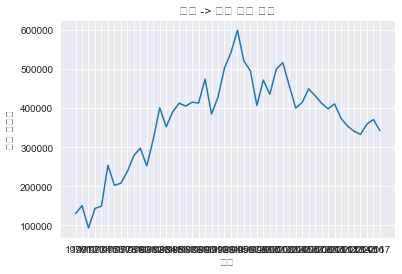

In [33]:
# 정리

import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

## Matplotlib 한글 폰트 오류 해결

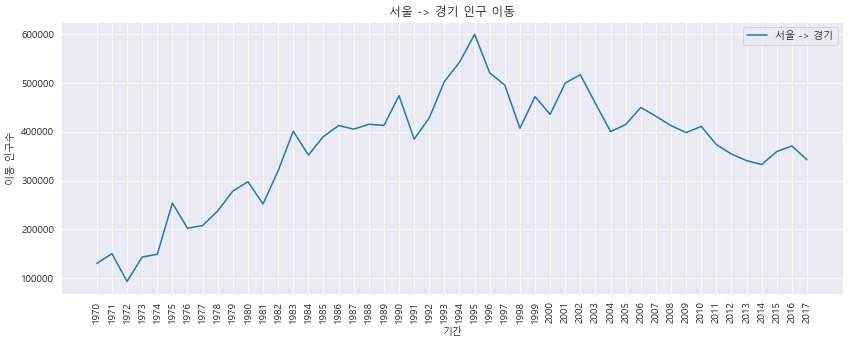

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')     #차트 제목
plt.xlabel('기간')                      #x축
plt.ylabel('이동 인구수')               #y축

plt.legend(labels=['서울 -> 경기'], loc='best')   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

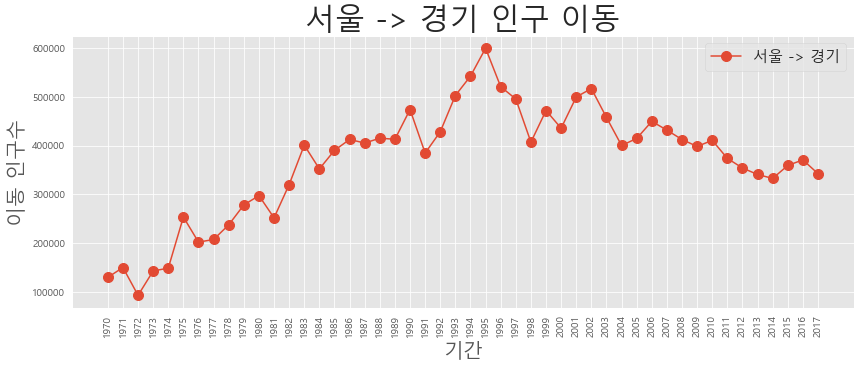

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)     #차트 제목
plt.xlabel('기간', size=20)                      #x축
plt.ylabel('이동 인구수', size=20)               #y축

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [36]:
import matplotlib.pyplot as plt

print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


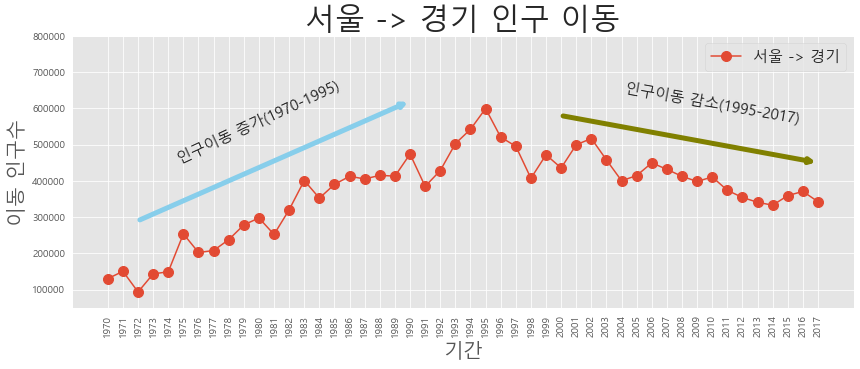

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)     #차트 제목
plt.xlabel('기간', size=20)                      #x축
plt.ylabel('이동 인구수', size=20)               #y축

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20,620000),     # 화살표의 머리 부분(끝점)
            xytext=(2,290000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',    # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),   # 화살표 서식
            )

plt.annotate('',
            xy=(47,450000),     # 화살표의 머리 부분(끝점)
            xytext=(30,580000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',    # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='olive', lw=5),   # 화살표 서식
            )

# 주석표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',     # 텍스트 입력
             xy=(10,450000),                 # 텍스트 위치 기준점
             rotation=25,                    # 텍스트 회전 각도
             va='baseline',                  # 텍스트 상하 정렬
             ha='center',                    # 텍스트 좌우 정렬
             fontsize=15                     # 텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',     # 텍스트 입력
             xy=(40,560000),                 # 텍스트 위치 기준점
             rotation=-10,                    # 텍스트 회전 각도
             va='baseline',                  # 텍스트 상하 정렬
             ha='center',                    # 텍스트 좌우 정렬
             fontsize=15                     # 텍스트 크기
             )


plt.show()  # 변경사항 저장하고 그래프 출력

###### Q. '서울 -> 충남, 경북, 강원 인구 이동' 을 설명하는 그래프를 출력하세요.

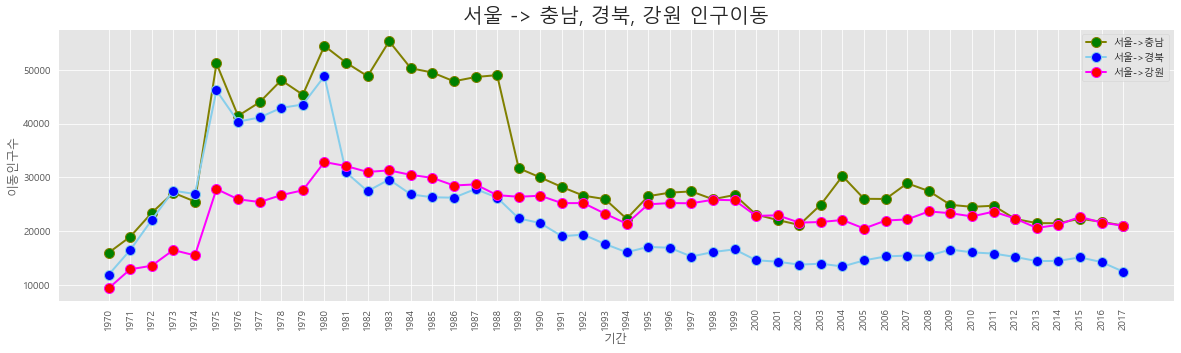

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/USER/workspace/ml_python/malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 충남, 경북, 강원도로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

#스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1) # 1행 1열에 하나

# axe 객체에  plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o',markerfacecolor='green',
       markersize=10, color='olive',linewidth=2, label='서울->충남')

ax.plot(col_years, df_3.loc['경상북도',:], marker='o',markerfacecolor='blue',
       markersize=10, color='skyblue',linewidth=2, label='서울->경북')

ax.plot(col_years, df_3.loc['강원도',:], marker='o',markerfacecolor='red',
       markersize=10, color='magenta',linewidth=2, label='서울->강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size=20)

# 축이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동인구수', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years,rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

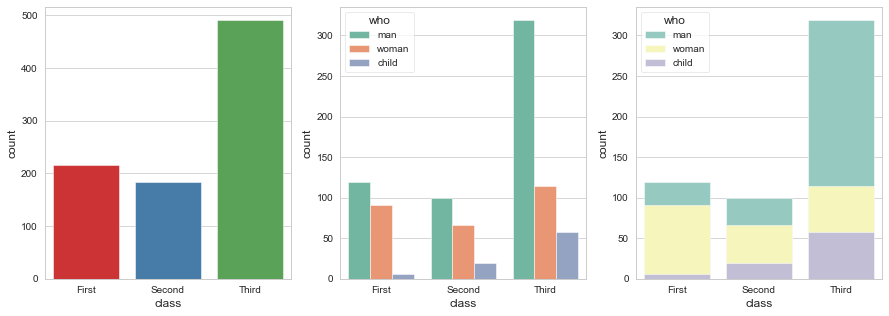

In [42]:
# 라이브러리 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette ='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue ='who',palette ='Set2', data=titanic, ax=ax2)

# dodge = False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

plt.show()

## Q. 타이타닉 생존자 예측 모델 개발을 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


'상단 표 : 기본데이터'

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.000000,0,0,211.3375,1,3
1,1,1,1,0.920000,1,2,151.5500,2,3
2,1,0,0,2.000000,1,2,151.5500,2,3
3,1,0,1,30.000000,1,2,151.5500,2,3
4,1,0,0,25.000000,1,2,151.5500,2,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,7,0
1305,3,0,0,29.881138,1,0,14.4542,7,0
1306,3,0,1,26.500000,0,0,7.2250,7,0
1307,3,0,1,27.000000,0,0,7.2250,7,0


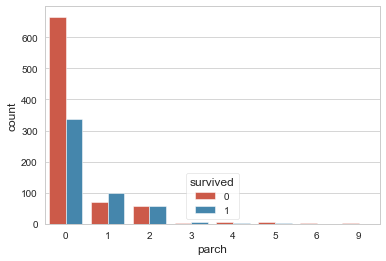

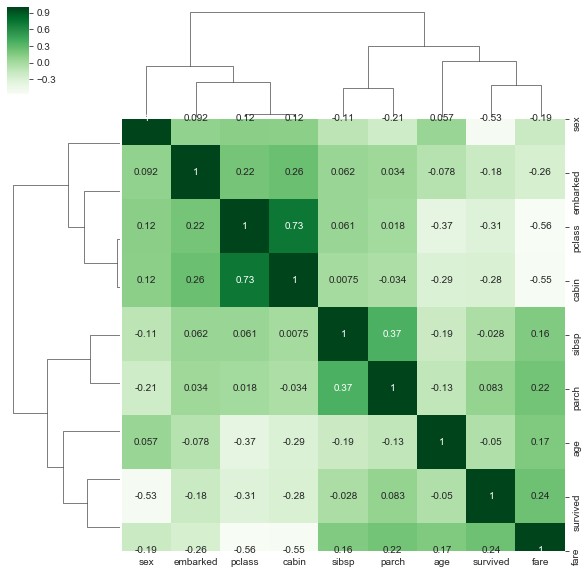

In [58]:
import pandas as pd

titanic_df = pd.read_csv('titanic3.csv')

titanic_df.head()

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # , category=FutureWarning 생략

# 데이터 정보
# Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# survival Survival (0 = No; 1 = Yes)
# name Name
# sex Sex
# age Age
# sibsp Number of Siblings/Spouses Aboard
# parch Number of Parents/Children Aboard
# ticket Ticket Number
# fare Passenger Fare (British pound)
# cabin Cabin
# embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat Lifeboat
# body Body Identification Number
# home.dest Home/Destination

titanic_df = pd.read_csv('titanic3.csv')

display(titanic_df.head(),'상단 표 : 기본데이터')
# display(titanic_df.info(),'INFORMATION')
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['home.dest','boat','body','name','ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


transform_features(titanic_df) # 메소드 호출 및 실행
f_plot=sns.countplot(x='parch',hue='survived', data=titanic_df)
f_plot
display(titanic_df)

sns.clustermap(titanic_df.corr(), metric="correlation",annot=True, cmap='Greens')